In [ ]:
#### CODE USED TO PLOT THE CHANGE IN RADIATION FROM POST-HIATUS PERIOD AND HIATUS PERIOD ####

In [ ]:
### FBCT CODE ###

In [130]:
# Load longwave and shortwave datasets for hiatus period
lw_flux_h = FBCT_flux.toa_lw_cldtyp_mon.sel(time=slice('2002-07','2014-06'))
sw_flux_h = FBCT_flux.toa_sw_cldtyp_mon.sel(time=slice('2002-07','2014-06'))

lw_flux_clr_h = FBCT_flux.toa_lw_clr_mon.sel(time=slice('2002-07','2014-06'))
sw_flux_clr_h = FBCT_flux.toa_sw_clr_mon.sel(time=slice('2002-07','2014-06'))

cld_area_h = FBCT_flux.cldarea_cldtyp_mon.sel(time=slice('2002-07','2014-06')) / 100

# Load longwave and shortwave datasets for post-hiatus period
lw_flux_ph = FBCT_flux.toa_lw_cldtyp_mon.sel(time=slice('2014-07','2017-06'))
sw_flux_ph = FBCT_flux.toa_sw_cldtyp_mon.sel(time=slice('2014-07','2017-06'))

lw_flux_clr_ph = FBCT_flux.toa_lw_clr_mon.sel(time=slice('2014-07','2017-06'))
sw_flux_clr_ph = FBCT_flux.toa_sw_clr_mon.sel(time=slice('2014-07','2017-06'))

cld_area_ph = FBCT_flux.cldarea_cldtyp_mon.sel(time=slice('2014-07','2017-06')) / 100

net_flux_h = -(lw_flux_h + sw_flux_h)
net_flux_clr_h = -(lw_flux_clr_h + sw_flux_clr_h)
net_flux_ph = -(lw_flux_ph + sw_flux_ph)
net_flux_clr_ph = -(lw_flux_clr_ph + sw_flux_clr_ph)

In [144]:
def get_mean_across_bins(x_cld,x_clr,hiatus):
    term_1_arr = []
    term_2_arr = []
    
    for i in range(0,7,1):
        for j in range(0,6,1):
            # Get cloud data in each p,t
            if hiatus == 'y':
                tot_cld_frac_bin = cld_area_h.sel(press=i,opt=j)
            elif hiatus == 'n':
                tot_cld_frac_bin = cld_area_ph.sel(press=i,opt=j)
            
            # Do calculations for each term in each p,tau bin
            term_1_calc = tot_cld_frac_bin * x_cld.sel(press=i,opt=j)
            term_2_calc = tot_cld_frac_bin
            
            # Append to arrays
            term_1_arr.append(term_1_calc)
            term_2_arr.append(term_2_calc)
    
    # Concat each array into DataArrays, and then sum
    term_1_xr = xr.concat(term_1_arr, dim='pressopt')
    term_1 = term_1_xr.sum(dim='pressopt')
    
    term_2_xr = xr.concat(term_2_arr, dim='pressopt')
    term_2 = term_2_xr.sum(dim='pressopt')
    
    return term_1 + x_clr * (1 - term_2)

In [145]:
lw_flux_hiatus = get_mean_across_bins(lw_flux_h,lw_flux_clr_h,'y')
lw_flux_post_hiatus = get_mean_across_bins(lw_flux_ph,lw_flux_clr_ph,'n')
lw_diff = lw_flux_post_hiatus.mean(dim='time') - lw_flux_hiatus.mean(dim='time')

sw_flux_hiatus = get_mean_across_bins(sw_flux_h,sw_flux_clr_h,'y')
sw_flux_post_hiatus = get_mean_across_bins(sw_flux_ph,sw_flux_clr_ph,'n')
sw_diff = sw_flux_post_hiatus.mean(dim='time') - sw_flux_hiatus.mean(dim='time')

net_flux_hiatus = get_mean_across_bins(net_flux_h,net_flux_clr_h,'y')
net_flux_post_hiatus = get_mean_across_bins(net_flux_ph,net_flux_clr_ph,'n')
net_diff = (net_flux_post_hiatus.mean(dim='time') - net_flux_hiatus.mean(dim='time'))

In [146]:
def get_ceres_cre_cld():
    # Set up subplots figure with PlateCarree projection
    fig, ax = plt.subplots(3,figsize=(18,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
    fig.tight_layout(h_pad=6)
    
    cmap = mpl.colors.ListedColormap(['midnightblue','navy','darkblue','mediumblue',
                                       'blue','slateblue','gray','gray','lightcoral',
                                       'indianred','brown','firebrick'])
    norm = mpl.colors.BoundaryNorm(np.arange(-12,12,2), cmap.N) 

    #cmap=plt.get_cmap('RdBu').reversed()

    # Give each plot gridlines, coastlines, and block out continents
    for i in np.arange(0,3,1):
        ax[i].gridlines()
        ax[i].coastlines()
        #ax[i].add_feature(cartopy.feature.LAND,zorder=100,facecolor='k',edgecolor='k')

    # Plot Trends
    sw_diff.plot(ax=ax[0],transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,
                           cbar_kwargs={'shrink': 0.9})#,vmin=-.1,vmax=.1)
    ax[0].set_title('CERES SW UPWARD')
    
    lw_diff.plot(ax=ax[1],transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,
                           cbar_kwargs={'shrink': 0.9})#,vmin=-.1,vmax=.1)
    ax[1].set_title('CERES LW UPWARD')
    
    net_diff.plot(ax=ax[2],transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,
                           cbar_kwargs={'shrink': 0.9})#,vmin=-.1,vmax=.1)
    ax[2].set_title('CERES NET DOWNWARD')

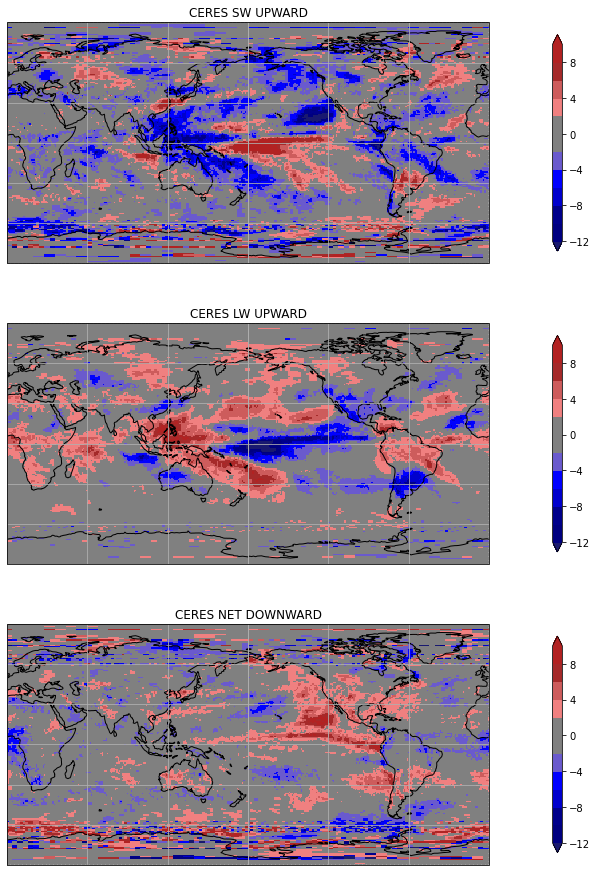

In [147]:
get_ceres_cre_cld()

In [ ]:
### EBAF CODE ###

In [176]:
sw_EBAF_flux_h = EBAF_flux.toa_sw_all_mon.sel(time=slice('2002-07','2014-06')).mean(dim='time')
lw_EBAF_flux_h = EBAF_flux.toa_lw_all_mon.sel(time=slice('2002-07','2014-06')).mean(dim='time')
net_EBAF_flux_h = EBAF_flux.toa_net_all_mon.sel(time=slice('2002-07','2014-06')).mean(dim='time')

sw_EBAF_flux_ph = EBAF_flux.toa_sw_all_mon.sel(time=slice('2014-07','2017-06')).mean(dim='time')
lw_EBAF_flux_ph = EBAF_flux.toa_lw_all_mon.sel(time=slice('2014-07','2017-06')).mean(dim='time')
net_EBAF_flux_ph = EBAF_flux.toa_net_all_mon.sel(time=slice('2014-07','2017-06')).mean(dim='time')

lw_EBAF_diff = lw_EBAF_flux_ph - lw_EBAF_flux_h
sw_EBAF_diff = sw_EBAF_flux_ph - sw_EBAF_flux_h
net_EBAF_diff = net_EBAF_flux_ph - net_EBAF_flux_h

In [177]:
def get_ceres_ebaf():
    # Set up subplots figure with PlateCarree projection
    fig, ax = plt.subplots(3,figsize=(18,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
    fig.tight_layout(h_pad=6)
    
    cmap = mpl.colors.ListedColormap(['midnightblue','navy','darkblue','mediumblue',
                                      'blue','slateblue','gray','gray','lightcoral',
                                      'indianred','brown','firebrick'])
    norm = mpl.colors.BoundaryNorm(np.arange(-12,12,2), cmap.N) 

    # Give each plot gridlines, coastlines, and block out continents
    for i in np.arange(0,3,1):
        ax[i].gridlines()
        ax[i].coastlines()
        #ax[i].add_feature(cartopy.feature.LAND,zorder=100,facecolor='k',edgecolor='k')

    # Plot Trends
    sw_EBAF_diff.plot(ax=ax[0],transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,
                           cbar_kwargs={'shrink': 0.9})#,vmin=-.1,vmax=.1)
    ax[0].set_title('CERES SW UPWARD')
    
    lw_EBAF_diff.plot(ax=ax[1],transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,
                           cbar_kwargs={'shrink': 0.9})#,vmin=-.1,vmax=.1)
    ax[1].set_title('CERES LW UPWARD')
    
    net_EBAF_diff.plot(ax=ax[2],transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,
                           cbar_kwargs={'shrink': 0.9})#,vmin=-.1,vmax=.1)
    ax[2].set_title('CERES NET DOWNWARD')

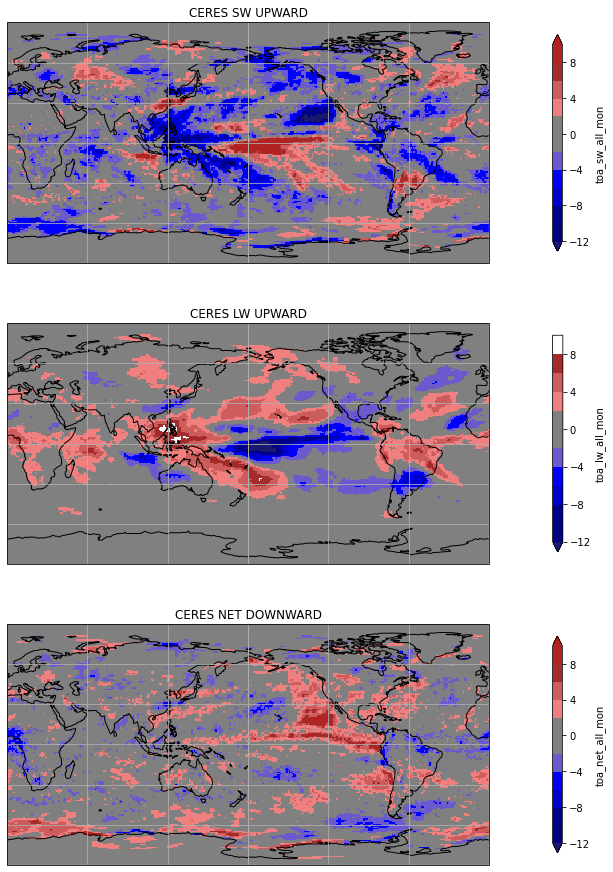

In [178]:
get_ceres_ebaf()